In [ ]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving CleanDataa.csv to CleanDataa.csv


In [ ]:
df = pd.read_csv('CleanDataa.csv',encoding='unicode_escape',sep=",", names=["tweet", "sentiment"],
                 usecols=[
                     'tweet', 
                     'sentiment',],
                 dtype={
                     'tweet': str,
                     'sentiment': str,
                 })
df

,tweet,sentiment
0,@ImpactXPToken: For those who missed our AMA ...,here is a recap. #ImpactXP to become a holdin...
1,@Crypto_Familyy: ALT season is Coming ! choos...,NaN
2,@AndieDog: The future belongs to those who be...,NaN
3,@klaraliron: How are your top #gems doing tod...,NaN
4,Hello there #Crypto market! Its been a while,nice to see you are back! #BTC #BNB #ETH #dog...
...,...,...
8369,@Alya_Bulya @ZelenskiyNFT Stands With Ukraineg...,NaN
8370,Should You Buy Forest Knight (KNIGHT) Saturday...,NaN
8371,#wluna #luna #lunc pucker day today,but no worries. The bigger the dip
8372,Blockchain is a new technology. Transfer and s...,NaN


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=03ea21a9773ef141bff4ed13d67f3d82f95bf89c7682b5aba924c8c49d51cef1
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import re
import string
from langdetect import detect

tagging_regex = re.compile(r"@\S*")
url_pattern = re.compile(r'https?://\S+|www\.\S+')
signature_pattern = re.compile(r"-\S*")
weird_thing_pattern = re.compile(r"\^\S*")
new_line_pattern = re.compile(r"\n+\S*")

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "IMMA": "I am going to",
    "2NITE": "tonight",
    "DMED": "mesaged",
    'DM': "message",
    "SMH": "I am dissapointed"
}

# Thanks to https://stackoverflow.com/a/43023503/3971619
contractions = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have / he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
}

# Reference : https://stackoverflow.com/a/49986645/3971619
def remove_emoji(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

# Thanks to user sudalairajkumar
def remove_url(string):
    return url_pattern.sub(r'', string)

def remove_chat_words_and_contractions(string):
    new_text = []
    for word in string.split(' '):
        if word.upper() in chat_words.keys():
            new_text += chat_words[word.upper()].lower().split(' ')
        if word.lower() in contractions.keys():
            new_text += contractions[word.lower()].split(' ')
        else:
            new_text.append(word)
            
    return ' '.join(new_text)

def remove_signature(text):
    return signature_pattern.sub(r'', text)
  
def word_repetition(tweet):
  tweet = re.sub(r'(!)1+', '', tweet)
  return tweet

# Thanks to user sudalairajkumar
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_message(message):
    # Remove user taggings
    message = re.sub(tagging_regex, '', message) # Replace by you. Good idea?
    
    #Remove ooo!
    message=word_repetition(message)

    # Remove the emojis
    message = remove_emoji(message)
    
    # Remove urls
    message = remove_url(message)
    
    # Remove signatures
    message = remove_signature(message)
    
    # Remove the chat words and contractions
    message = remove_chat_words_and_contractions(message)
    
    # Remove weird things
    message = weird_thing_pattern.sub(r'', message)

    # Change new line to dot
    message = new_line_pattern.sub(r'.', message)
    
    # Remove punctuation
    message = remove_punctuation(message)
    
    # Remove start and end whitespace
    message = message.strip()
    
    # Make multiple spaces become a single space
    message = ' '.join(message.split())
    
    # Lower case the message
    message = message.lower()
    
    # If not in english, return empty string
#     if message and len(message) > 15:
#         if detect(message) != 'en':
#             return ""
    
    return message

df['cleantext'] = df['tweet'].apply(lambda x: clean_message(x))

In [ ]:
df.drop_duplicates(subset= "cleantext",inplace = True)
df

,tweet,sentiment,cleantext
0,@ImpactXPToken: For those who missed our AMA ...,here is a recap. #ImpactXP to become a holdin...,for those who missed our ama last night
1,@Crypto_Familyy: ALT season is Coming ! choos...,NaN,alt season is coming choose your favorite altc...
2,@AndieDog: The future belongs to those who be...,NaN,the future belongs to those who believe in the...
3,@klaraliron: How are your top #gems doing tod...,NaN,how are your top gems doing today me was a lon...
4,Hello there #Crypto market! Its been a while,nice to see you are back! #BTC #BNB #ETH #dog...,hello there crypto market its been a while
...,...,...,...
8366,Rn im focussing on @PartyPunksNFT Because they...,NaN,rn im focussing on because they have the best ...
8368,Join the leopard tribe now to gain acces to an...,staking,join the leopard tribe now to gain acces to an...
8370,Should You Buy Forest Knight (KNIGHT) Saturday...,NaN,should you buy forest knight knight saturday i...
8372,Blockchain is a new technology. Transfer and s...,NaN,blockchain is a new technology transfer and st...


In [ ]:
with open('/content/positive-words.txt',encoding = "utf-8") as f:
    mylist = [line.rstrip('\n') for line in f]
    newlistP = []
    for line in mylist:
        line = line.split(',')             
        line = ','.join(line)               
        #print(line)
        newlistP.append(line)
    print(newlistP)
    

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [ ]:
with open('/content/negative-words.txt',encoding = "ISO-8859-1") as f:
    mylist = [line.rstrip('\n') for line in f]
    newlistN = []
    for line in mylist:
        line = line.split(',')             
        line = ','.join(line)               
        #print(line)
        newlistN.append(line)
    print(newlistN)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [ ]:
# positive = ['good','clean','walk','cycle','community','help',"health","get","want","light","superb",
#            "amaze", "brilliant", "awesome","win","better"]
# neutral = ['can','go','going','got','air','climate','in','shall',"he","happens","grocery","person",
#           'storage','space','really',"time","apartment"]
# negative= ['pathetic','stupid','mad','idiot','insane','sad','tough','annoy','boo','']
# for i in positive:
#     words.loc[words["words"]==i,"cluster_value"]=1
    
# for i in neutral:
#     words.loc[words["words"]==i,"cluster_value"]=0
    
# for i in negative:
#     words.loc[words["words"]==i,"cluster_value"]=-1

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df['cleantext'] = df['cleantext'].astype('str') 
def get_polarity(text): 
  return TextBlob(text).sentiment.polarity 
df['Polarity'] = df['cleantext'].apply(get_polarity)

In [ ]:
df['Sentiment']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

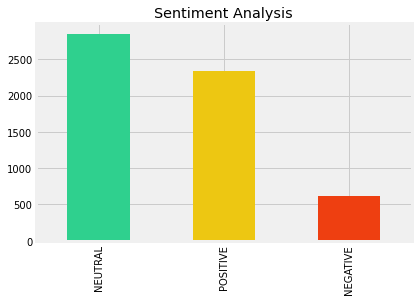

In [ ]:
df.Sentiment_Type.value_counts().plot(kind='bar', color= ['#2fd08e', '#edc712', '#ee3f11'], title="Sentiment Analysis")

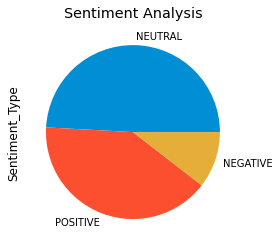

In [ ]:
df.Sentiment_Type.value_counts().plot(kind='pie', title="Sentiment Analysis")

In [ ]:
df

,tweet,sentiment,cleantext,Polarity,Sentiment,Sentiment_Type
0,@ImpactXPToken: For those who missed our AMA ...,here is a recap. #ImpactXP to become a holdin...,for those who missed our ama last night,0.000000,,NEUTRAL
1,@Crypto_Familyy: ALT season is Coming ! choos...,NaN,alt season is coming choose your favorite altc...,0.500000,,POSITIVE
2,@AndieDog: The future belongs to those who be...,NaN,the future belongs to those who believe in the...,0.000000,,NEUTRAL
3,@klaraliron: How are your top #gems doing tod...,NaN,how are your top gems doing today me was a lon...,0.225000,,POSITIVE
4,Hello there #Crypto market! Its been a while,nice to see you are back! #BTC #BNB #ETH #dog...,hello there crypto market its been a while,0.000000,,NEUTRAL
...,...,...,...,...,...,...
8366,Rn im focussing on @PartyPunksNFT Because they...,NaN,rn im focussing on because they have the best ...,1.000000,,POSITIVE
8368,Join the leopard tribe now to gain acces to an...,staking,join the leopard tribe now to gain acces to an...,0.000000,,NEUTRAL
8370,Should You Buy Forest Knight (KNIGHT) Saturday...,NaN,should you buy forest knight knight saturday i...,0.000000,,NEUTRAL
8372,Blockchain is a new technology. Transfer and s...,NaN,blockchain is a new technology transfer and st...,0.136364,,POSITIVE


In [ ]:
df.drop('Polarity', axis=1, inplace=True)
df

,cleantext,Sentiment_Type
0,for those who missed our ama last night,NEUTRAL
1,alt season is coming choose your favorite altc...,POSITIVE
2,the future belongs to those who believe in the...,NEUTRAL
3,how are your top gems doing today me was a lon...,POSITIVE
4,hello there crypto market its been a while,NEUTRAL
...,...,...
8366,rn im focussing on because they have the best ...,POSITIVE
8368,join the leopard tribe now to gain acces to an...,NEUTRAL
8370,should you buy forest knight knight saturday i...,NEUTRAL
8372,blockchain is a new technology transfer and st...,POSITIVE


In [ ]:
 df.to_csv('CleanData.csv', encoding='utf-8', index=False)
 df

,cleantext,Sentiment_Type
0,for those who missed our ama last night,NEUTRAL
1,alt season is coming choose your favorite altc...,POSITIVE
2,the future belongs to those who believe in the...,NEUTRAL
3,how are your top gems doing today me was a lon...,POSITIVE
4,hello there crypto market its been a while,NEUTRAL
...,...,...
8366,rn im focussing on because they have the best ...,POSITIVE
8368,join the leopard tribe now to gain acces to an...,NEUTRAL
8370,should you buy forest knight knight saturday i...,NEUTRAL
8372,blockchain is a new technology transfer and st...,POSITIVE
